In [1]:
# !conda env list

# Keras를 사용한 개발 과정
1. 입력 텐서(X)와 출력 텐서(y)로 이뤄진 훈련 데이터를 정의
2. 입력과 출력을 연결하는 Layer(층)으로 이뤄진 네트워크(모델)을 정의
    - Sequential 방식: 순서대로 쌓아올린 네트워크로 이뤄진 모델을 생성하는 방식
    - Functional API 방식: 다양한 구조의 네트워크로 이뤄진 모델을 생성하는 방식
    - Subclass 방식: 네트워크를 정의하는 클래스를 구현.
    
3. 모델 컴파일
    - 모델이 Train(학습)할때 사용할 손실함수(Loss Function), 최적화기법(Optimizer), 학습과정을 모니터링할 평가지표(Metrics)를 설정
4. Training(훈련)
    - 모델의 fit() 메소드에 훈련데이터(X,y)를 넣어 Train.
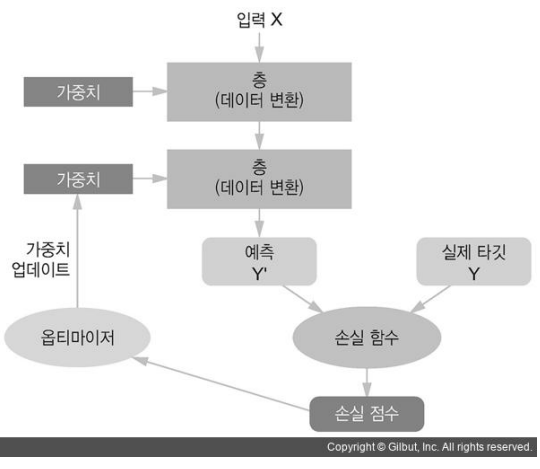

# MNIST 이미지 분류 
- ### [MNIST](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)(Modified National Institute of Standards and Technology) database
- 흑백 손글씨 숫자 0-9까지 10개의 범주로 구분해놓은 데이터셋
- 하나의 이미지는 28 * 28 pixel 의 크기
- 6만개의 Train 이미지와 1만개의 Test 이미지로 구성됨.

In [2]:
import tensorflow as tf 
from tensorflow import keras 

In [3]:
tf.__version__

'2.0.0'

In [4]:
keras.__version__

'2.2.4-tf'

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
type(X_train), type(y_train) # numpy.ndarray 형태로 넘어온다 

(numpy.ndarray, numpy.ndarray)

In [7]:
X_train.shape , X_test.shape  # 튜플 : (이미지갯수, height, width, channel)

((60000, 28, 28), (10000, 28, 28))

In [8]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [9]:
X_train[0] # 첫번째 데이터 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

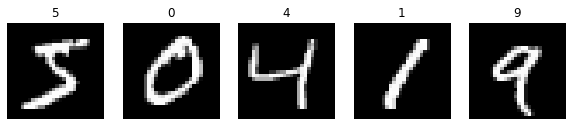

In [10]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (10,10))

for i in range(5): # 5개 이미지를 확인 
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i], cmap = 'gray') # 이미지 보여주기 , colormap를 gray로 변경 
    plt.title(y_train[i])
    plt.axis('off') #  틱 안나오게 
    
# plt.colorbar()    
plt.show()

## 신경망 구현
- 3가지 방법 중 시퀀셜? 

## network : 전체 모델 구조 만들기
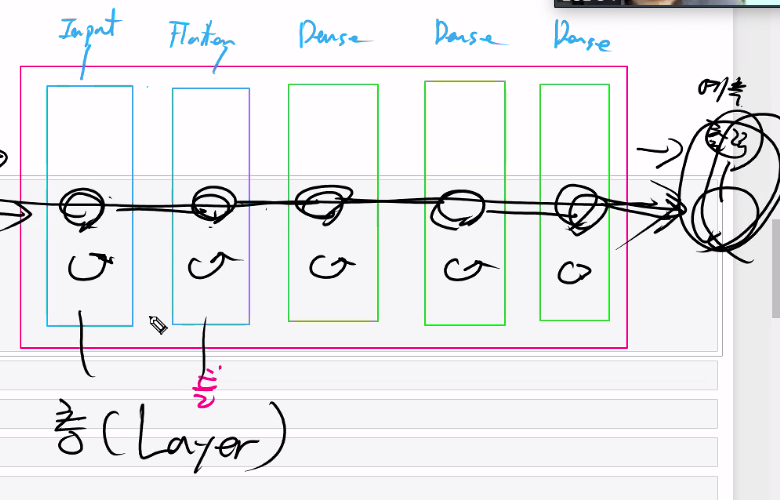

- 마지막에 쌓는 애를 출력층이라고 한다 

In [11]:
# 모델 생성 
model = keras.Sequential() # 모델의 틀이 만들어 졌다. 

# 층layer을 모델에 추가한다. 
model.add(keras.layers.Input((28,28))) # 
model.add(keras.layers.Flatten()) # 

model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [13]:
# !pip install pydot pydotplus graphviz

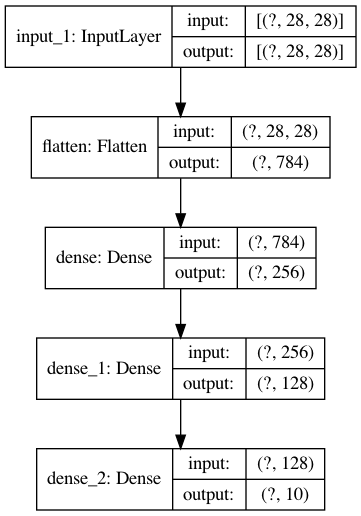

In [14]:
from tensorflow.keras.utils import plot_model

# plot_model(model)
# plot_model(model, to_file = 'model.png') # 파일로 저장 
plot_model(model, show_shapes=True) # input, outpu 에 대해서 보여주낟 

## 컴파일 단계
- 구축된 모델에 추가 설정
- 손실함수
- Optimizer(최적화 함수)
- 평가지표

In [15]:
model.compile(
    optimizer = 'adam', # optimizer등록
    loss = 'categorical_crossentropy', # loss function 등록 
    matrics = ['accuracy'] # 최종평가가 아니다. 평가지표이다. 트레인도중에 밸리데이션 결과를 확인한다. 
)

## 데이터 준비
- X
    - 0 ~ 1 사이의 값으로 정규화 시킨다. 
- y
    - one hot encoding 처리
    - tensorflow.keras 의 to_categorical() 함수 이용

In [16]:
X_train = X_train/255.
X_test = X_test/255.

In [17]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [18]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [20]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [21]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## 학습 (fit)


In [23]:
model.fit(X_train, y_train,
         epochs=10,  # 전체 트레인데이터셋을 1번 학습하는 것을 1에폭, 
         batch_size=100, # 파라미터 업데이터 (최적화)를 100개 마다 처리해라. 
         validation_split=0.2 # 검증용 데이터셋 80%는 학습 20%는 검증 
) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 104us/sample - loss: 0.2912 - val_loss: 0.1341
Epoch 2/10
48000/48000 [==============================] - 4s 84us/sample - loss: 0.1087 - val_loss: 0.0935
Epoch 3/10
48000/48000 [==============================] - 4s 90us/sample - loss: 0.0721 - val_loss: 0.0927
Epoch 4/10
48000/48000 [==============================] - 4s 93us/sample - loss: 0.0489 - val_loss: 0.0793
Epoch 5/10
48000/48000 [==============================] - 5s 96us/sample - loss: 0.0356 - val_loss: 0.0896
Epoch 6/10
48000/48000 [==============================] - 5s 102us/sample - loss: 0.0259 - val_loss: 0.1238
Epoch 7/10
48000/48000 [==============================] - 5s 110us/sample - loss: 0.0228 - val_loss: 0.0914
Epoch 8/10
48000/48000 [==============================] - 5s 104us/sample - loss: 0.0158 - val_loss: 0.0930
Epoch 9/10
48000/48000 [==============================] - 5s 115us/sample - loss: 0.0152 -

In [24]:
# ! pip install -U numpy

## 테스트셋 평가

### 추론 메소드
- predict()
    - 각 클래스 별 확률 반환
- <del>predict_classes()</del>
    - 클래스(범주값) 반환
    - tensorflow 2.3 부터 deprecated 됨
- 이진 분류(binary classification)
    - `numpy.argmax(model.predict(x) > 0.5).astype("int32")`
- 다중클래스 분류(multi-class classification)
    - `numpy.argmax(model.predict(x), axis=-1)`
-     

In [25]:
# model.evaluate(X_test, y_test)

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test)
# print(test_loss, test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

TypeError: cannot unpack non-iterable numpy.float64 object

In [ ]:
# 뭔가 오타가 난것 같은데 ㅎㅎ 

In [27]:
X_test[:10].shape

(10, 28, 28)

In [28]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [29]:
import numpy as np 
np.argmax(y_test[:10], axis = -1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [31]:
# 추론 --> 클래스별 확률 
pred = model.predict(X_test[:10])

In [32]:
pred.shape

(10, 10)

In [33]:
np.round(pred,3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.   ,
        0.001],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.997, 0.002, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ]], dtype=float32)

In [34]:
np.argmax(pred,axis=-1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [35]:
model.predict_classes(X_test[:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])